<a href="https://colab.research.google.com/github/iwolt21/Expected-Goals-Project/blob/main/Assignment1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS-4120 Machine Learning and Data Mining Assignment 1
# Isaac Wolters

# 1. Data Description and Analysis

Soccer is a huge part of my life. I play, ref, coach, and watch the sport daily. I also enjoy fantasy sports, which is all about using stats and trying to predict how certain players will do. While browsing Kaggle for good datasets based on soccer data, I came across a dataset that contained great information on almost 300 000 different shots from multiple games and multiple leagues between 2014 to 2020. This is the dataset that I selected for the assignment.

With the introduction of statistics into professional soccer, one of the main stats is called xG, or expected goals. This is a model that takes into account shot location, angle, defender positions, type of pass, type of shot, and other metrics that vary on the model used. xG provides a decimal number from 0 to 1 that indicates the likelihood of a goal being scored from that action, taking the historical data considered by the model. For example, a shot taken from 6 meters directly in front of the goal would have a high xG, say 0.65, while a shot taken off to the side from 20 meters away might only have an xG of 0.1.


For this project, I will attempt to evaluate the shots from this dataset and their likelyhood of resulting in a goal. While I do not have a complete dataset with all of the necessary parameters to calculate a precise xG, I do have multiple useful parameters that should allow me to get a reasonable result.

I will use a variety of different machine learning model to analyze and predict the result of these shot. I believe regression models will be the best to use, as I am mainly trying to predict the probability of a goal being scored or not. Some models I may try will be linear regression, polynomial regression and logistic regression. I may also try some other models, but I expect those two to be the best predictors for my purpose of calculating an xG value for a given shot.

As I mentioned briefly, this dataset contains information on almost 300 000 shots from multiple different league between 2014 and 2020.
Some of the useful columns that I will be using will be the X and Y coordinates of the shot (0-100), the type of shot (shotType), and the situation of the shot.

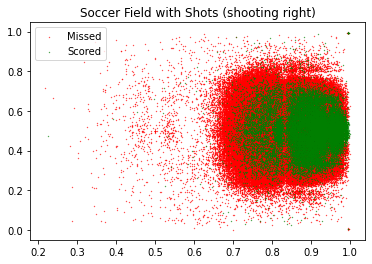

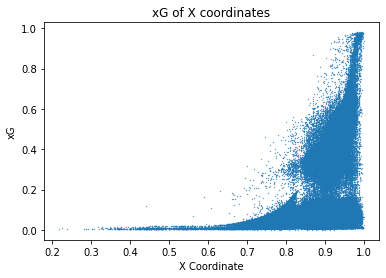

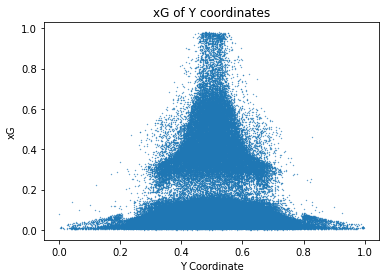

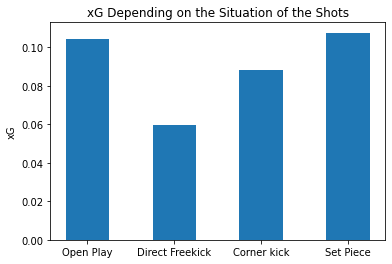

Average xG of 212869 Open Play shots: 0.1044
Average xG of 13589 Direct Freekick shots: 0.0598
Average xG of 42066 Corner kick shots: 0.0884
Average xG of 19088 Set Piece shots: 0.1077


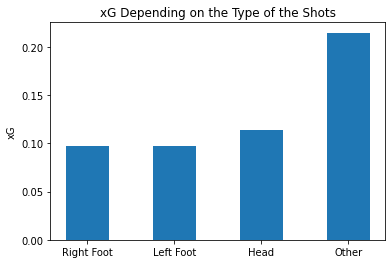

Average xG of 147304 Right Foot shots: 0.0969
Average xG of 90782 Left Foot shots: 0.0968
Average xG of 48582 Headed shots: 0.1139
Average xG of 944 Other shots: 0.2149

The number of shots in the dataset: 287612
Average xG of all shots: 0.1001


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Read necessary columns from csv file
columns = ["id", "minute", "result", "X", "Y", "xG", "h_a", "situation", "shotType", "match_id", "lastAction"]
df = pd.read_csv(r"drive/MyDrive/Colab Notebooks/xG Data/FullShotsData.csv", header=0, usecols=columns)

# Do not want to consider own goals in my analysis
df = df[df['result'] != 'OwnGoal']
df = df[df['situation'] != "Penalty"]

idIND = 0
minIND = 1
resIND = 2
XIND = 3
YIND = 4
xGIND = 5
h_aIND = 6
situationIND = 7
shotTypeIND = 8
matchIND = 9
lastActIND = 10

npGoalsX = []
npGoalsY = []
npNonGoalsX = []
npNonGoalsY = []
situationStats = [[[], [], [], []], [0, 0, 0, 0]]
shotTypeStats = [[[], [], [], []], [0, 0, 0, 0]]

# Arrange additional data for visualizing
for data in df.values:
  # Goals data - track goals scored
  if data[resIND] == "Goal":
    npGoalsX.append(data[XIND])
    npGoalsY.append(data[YIND])

  # Missed/Saved/Blocked shots
  else:
    npNonGoalsX.append(data[XIND])
    npNonGoalsY.append(data[YIND])

  # Consider Situations, form data for visualizing
  if data[situationIND] == "OpenPlay":
    situationStats[0][0].append(data[xGIND])
    situationStats[1][0] += 1
  elif data[situationIND] == "DirectFreekick":
    situationStats[0][1].append(data[xGIND])
    situationStats[1][1] += 1
  elif data[situationIND] == "FromCorner":
    situationStats[0][2].append(data[xGIND])
    situationStats[1][2] += 1
  elif data[situationIND] == "SetPiece":
    situationStats[0][3].append(data[xGIND])
    situationStats[1][3] += 1

  # Consider Shot Types, form data for visualizing
  if data[shotTypeIND] == "RightFoot":
    shotTypeStats[0][0].append(data[xGIND])
    shotTypeStats[1][0] += 1
  elif data[shotTypeIND] == "LeftFoot":
    shotTypeStats[0][1].append(data[xGIND])
    shotTypeStats[1][1] += 1
  elif data[shotTypeIND] == "Head":
    shotTypeStats[0][2].append(data[xGIND])
    shotTypeStats[1][2] += 1
  elif data[shotTypeIND] == "OtherBodyPart":
    shotTypeStats[0][3].append(data[xGIND])
    shotTypeStats[1][3] += 1


# Plot goals in green and non-goals in red
plt.scatter(npNonGoalsX, npNonGoalsY, color="red", s=0.1, label="Missed")
plt.scatter(npGoalsX, npGoalsY, color="green", s=0.1, label="Scored")
plt.title("Soccer Field with Shots (shooting right)")
plt.legend(loc="upper left")
plt.show()

# Plot the xG of X coordinates
plt.scatter(df['X'], df['xG'], s=0.1)
plt.title("xG of X coordinates")
plt.xlabel("X Coordinate")
plt.ylabel("xG")
plt.show()

# Plot the xG of Y coordinates
plt.scatter(df['Y'], df['xG'], s=0.1)
plt.title("xG of Y coordinates")
plt.xlabel("Y Coordinate")
plt.ylabel("xG")
plt.show()

# Make graph for situationStats - average xGs first
averages = [0, 0, 0, 0]
totalxG = 0
for i in range(4):
  totalxG += sum(situationStats[0][i])
  averages[i] = sum(situationStats[0][i])/situationStats[1][i]
plt.bar(["Open Play", "Direct Freekick", "Corner kick", "Set Piece"], averages, 0.5, bottom=0)
plt.title("xG Depending on the Situation of the Shots")
plt.ylabel("xG")
plt.show()

# Data from above plot
print("Average xG of", situationStats[1][0],"Open Play shots:", round(averages[0], 4))
print("Average xG of", situationStats[1][1],"Direct Freekick shots:", round(averages[1], 4))
print("Average xG of", situationStats[1][2],"Corner kick shots:", round(averages[2], 4))
print("Average xG of", situationStats[1][3],"Set Piece shots:", round(averages[3], 4))

# Make graph for shotTypeStats - average xGs first
for i in range(4):
  averages[i] = sum(shotTypeStats[0][i])/shotTypeStats[1][i]
plt.bar(["Right Foot", "Left Foot", "Head", "Other"], averages, 0.5, bottom=0)
plt.title("xG Depending on the Type of the Shots")
plt.ylabel("xG")
plt.show()

# Data from above plot
print("Average xG of", shotTypeStats[1][0],"Right Foot shots:", round(averages[0], 4))
print("Average xG of", shotTypeStats[1][1],"Left Foot shots:", round(averages[1], 4))
print("Average xG of", shotTypeStats[1][2],"Headed shots:", round(averages[2], 4))
print("Average xG of", shotTypeStats[1][3],"Other shots:", round(averages[3], 4))

# Stats for all shots
print("\nThe number of shots in the dataset:", len(df.values))
print("Average xG of all shots:", round(totalxG / sum(situationStats[1]), 4))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


One thing to note is that I have separated penalties and own goals from the rest of the data. This is because they are a completely different type of shot. Penalty shots are awarded when there is a foul inside the 18 yard box. A penalty shot is from 10 meters away from the goal, with no defenders and the goalkeeper on the line. Penalties are often awarded a static xG of 0.76 roughly. Own goals are also very different to regular shots, as they are often deflections, or unintentional goals scored by the wrong team, so there is no intention to them.

In the first figure, I plotted the coordinates for all of the shots and coloured them based on the result. The green points resulted in goals, while the red point were not goals. There are over 200 000 points in the graph, so it is difficult to see the density as it gets closer to the goal, but it is quite clear that the majority of the goals come from inside the 18 yard box and from a central position.

I also found it interesting how, in the first figure, there are relatively few shots taken from very close to the lines marked on the field for the 18 yard box, and even for the 6 yard box. This could be just due to the data not being completely accurate with the coordinates, but it does make sense. Often, players will want to be completely inside the 18 yard box with the ball, as they may be able to draw a penalty, and at the same time, defenders want to make sure the attacker stays clearly outside of the 18 yard box to avoid giving away a penalty.

In the second and third figures, I constructed scatter plots, one for the X coordinate and one for the Y coordinate, based on xG. As you can clearly see, the closer to the goal you are (higher X coordinate) and the more central you are (0.5 Y coordinate), the higher the xG of the shot.

In the fourth plot, I created a bar plot to show the average xG of different shot situations. The average xG of direct freekicks are quite a lot lower than the other situations, as they are often further out (lower X coordinate). The average xG of open play and set piece shots are the highest, as they are often shots from much closer to the goal, so this barplot make sense.

In the fifth plot, I created a similar bar plot, but for the average xG of different shot types. While right foot, left foot, and headed shots are pretty similar, shots taken by "Other body parts" are significantly higher. Thinking about this, it is likely due to the fact that these shots also happen closer to the goal, where players just want the ball to hit them anywhere and it will go in the goal.

Looking at these plots, they likely all come back to the X and Y coordinates. xG also sometimes considers the defender and goalkeeper positions for the defending team, but as I do not have that data, I will just use what I have.

# 2. Prediction

Now it is time to perform machine learning on the data. As mentioned, I believe regression models will work the best, and I will begin with linear regression.

For many of the errors, I am using mean absolute error, instead of squared, as the values are between 0-1, so squaring it would reduce the error, instead of increasing it.

Note: there is no need to perform feature scaling, normalization, standardization, etc., as all used features are between 0 and 1 already (once catergorical columns are encoded), although I do try standardization for some models.

In [ ]:
# Import statements
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn import metrics
from sklearn.decomposition import PCA


In [ ]:
def get_stats(model, x):
  # Basic linear regression model
  X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=1)
  model.fit(X_train, Y_train)
  Ypred = model.predict(X_test)
  print("The mean absolute error on the test set with was", round(metrics.mean_absolute_error(Y_test, Ypred), 4))

  # Calculate the R-Squared value for a regression model
  print("The R-Squared value for this model is:", metrics.r2_score(Y_test, Ypred))

  get_residual_plot(Y_test, Ypred)
  return X_train, X_test, Y_train, Y_test, Ypred

def get_residual_plot(y_t, y_p):
  # Create a residual plot
  residuals = y_t - y_p
  plt.scatter(y_p, residuals, alpha=0.5)
  plt.xlabel('Predicted values')
  plt.ylabel('Residuals')
  plt.title('Residual plot')
  plt.show()

def section_mapping(value):
    for key, sect in sections.items():
        if value >= key:
            return sect


sections = {
    0.8: "wide",
    0.6: "channel",
    0.4: "middle",
    0.2: "channel",
    -0.1: "wide"
}

All columns : The mean absolute error on the mean of the cross-validation modelling was 0.0798
The mean absolute error on the test set with was 0.0799
The R-Squared value for this model is: 0.3583117461797204


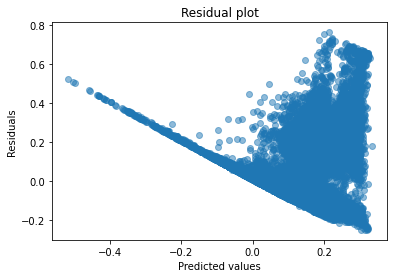

No shotType : The mean absolute error on the mean of the cross-validation modelling was 0.0805
The mean absolute error on the test set with was 0.0805
The R-Squared value for this model is: 0.31992973845405526


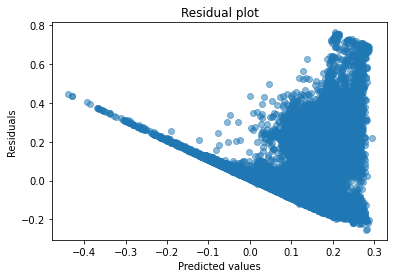

No situation : The mean absolute error on the mean of the cross-validation modelling was 0.0808
The mean absolute error on the test set with was 0.0809
The R-Squared value for this model is: 0.3436295934943223


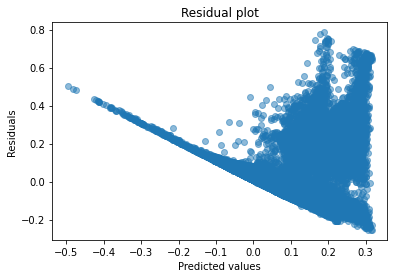

No shotType and situation : The mean absolute error on the mean of the cross-validation modelling was 0.0813
The mean absolute error on the test set with was 0.0813
The R-Squared value for this model is: 0.2859425261590932


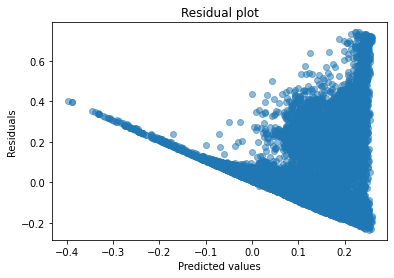

In [ ]:
# Non-penalty and own goal shots

# Make Y coordinate into sections on field
df['Y_sects'] = pd.Categorical(df["Y"].map(section_mapping), categories=set(sections.values()), ordered=True)

# Non penalty, predictor is xG, set up X
y = df['xG']
X = df.drop(['id', 'minute', 'result', 'Y', 'xG', 'h_a', 'match_id', 'lastAction'], axis=1)

# Do manual feature selection - see if model improves without shotType, situation, or both (X and Y are clearly needed based on the graphs from part 1)
featuresX = [X]
featuresX.append(X.drop(['shotType'], axis=1))
featuresX.append(X.drop(['situation'], axis=1))
featuresX.append(featuresX[1].drop(['situation'], axis=1))
namesX = ["All columns", "No shotType", "No situation", "No shotType and situation"]

linreg = LinearRegression()

for i in range(len(featuresX)):
  # Need dummy variables for the categorical columns
  featuresX[i] = pd.get_dummies(data=featuresX[i], drop_first=True)

  print(namesX[i], ": ", end="")

  # Linear regression model with k-fold cross-validation (10 folds)
  scores = cross_val_score(linreg, featuresX[i], y, cv=10, scoring='neg_mean_absolute_error')
  print("The mean absolute error on the mean of the cross-validation modelling was", round(-1*scores.mean(), 4))
  get_stats(linreg, featuresX[i])

# The best model comes out to be using all columns, so I do not need to remove anymore - use X for data
X = featuresX[0]

Reducing the dimensions to 1 :
The mean absolute error on the test set with was 0.0879
The R-Squared value for this model is: 0.057146459868494204


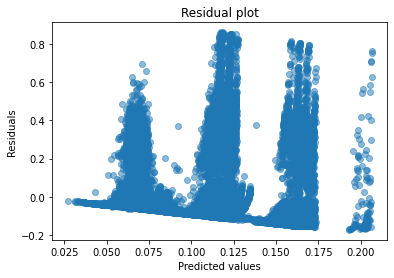

Reducing the dimensions to 2 :
The mean absolute error on the test set with was 0.0879
The R-Squared value for this model is: 0.05812094799540335


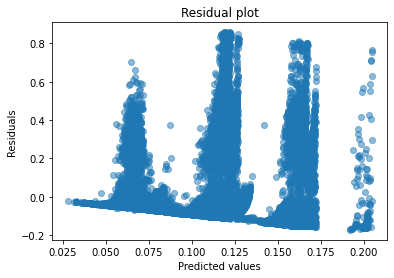

Reducing the dimensions to 3 :
The mean absolute error on the test set with was 0.0867
The R-Squared value for this model is: 0.09386277074893568


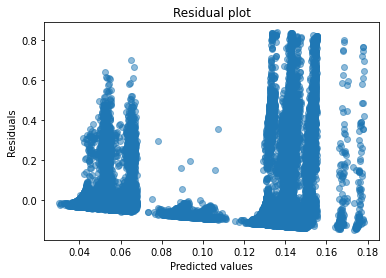

Reducing the dimensions to 4 :
The mean absolute error on the test set with was 0.0866
The R-Squared value for this model is: 0.09751084984594305


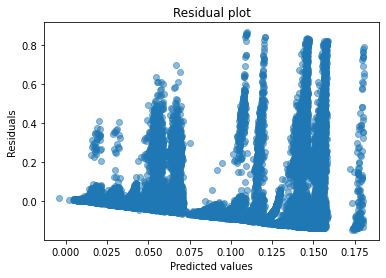

Reducing the dimensions to 5 :
The mean absolute error on the test set with was 0.0809
The R-Squared value for this model is: 0.16460848111216198


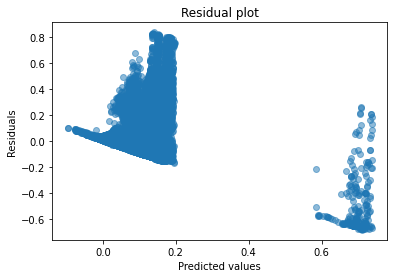

Reducing the dimensions to 6 :
The mean absolute error on the test set with was 0.0821
The R-Squared value for this model is: 0.28778483888512096


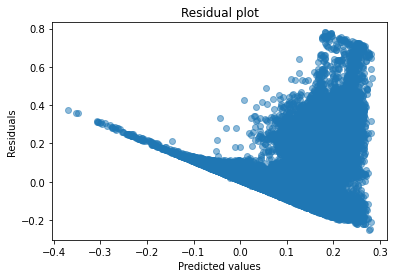

Reducing the dimensions to 7 :
The mean absolute error on the test set with was 0.0811
The R-Squared value for this model is: 0.3496357366503162


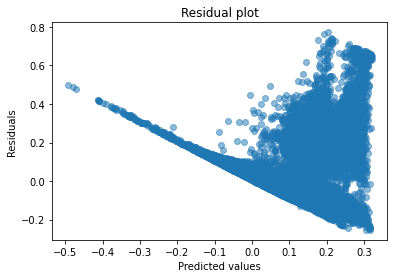

Reducing the dimensions to 8 :
The mean absolute error on the test set with was 0.08
The R-Squared value for this model is: 0.35601450038291205


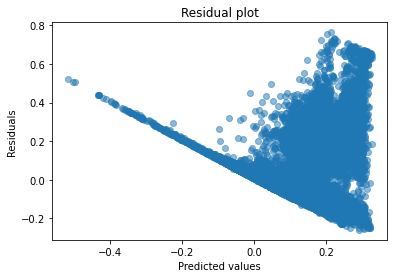

Reducing the dimensions to 9 :
The mean absolute error on the test set with was 0.0799
The R-Squared value for this model is: 0.3583117461797205


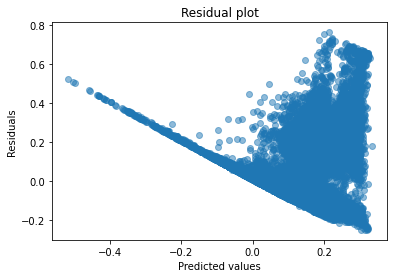

In [ ]:
# Trying dimensionality Reduction

X_std = StandardScaler().fit_transform(X)
d_range = list(range(1, 10))
d_mae_test = []
d_mae_train = []
d_r2_test = []
d_r2_train = []
for i in range(1, 10):
  print("Reducing the dimensions to", i, ":")
  pca = PCA(n_components=i)

  # Fit and Apply dimensionality reduction on X_std
  Z = pca.fit_transform(X_std)

  X_train, X_test, y_train, y_test, y_pred = get_stats(linreg, Z)

  d_mae_test.append(metrics.mean_absolute_error(y_test, y_pred))
  d_mae_train.append(metrics.mean_absolute_error(y_train, linreg.predict(X_train)))
  d_r2_test.append(metrics.r2_score(y_test, y_pred))
  d_r2_train.append(metrics.r2_score(y_train, linreg.predict(X_train)))

In [ ]:
%matplotlib inline

# plot the values of the accuracy over the training set and over the testing set
plt.plot(d_range, d_mae_test,'b', label='MAE on the TEST set')
plt.plot(d_range, d_mae_train,'r', label='MAE on the TRAIN set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Dimensional Reduction')
plt.ylabel('Mean Absolute Error')
plt.show()

%matplotlib inline

# plot the values of the accuracy over the training set and over the testing set
plt.plot(d_range, d_r2_test,'b', label='R-squared on the TEST set')
plt.plot(d_range, d_r2_train,'r', label='R-squared on the TRAIN set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Dimensional Reduction')
plt.ylabel('R2')

Above, I iterated over different reductions in dimension, from just 1 dimension to all dimensions (9).
As you can see, the fewer the dimensions, the less accurate the model is, as we are losing some of the variance of the original data, shown also with the lower R-Squared values.

As a result, our best model is still the linear regression model with all 4 original columns (X, Y_sects, situation, shotType), although they are split into 9 due to dummy variables.
Dimensions 1 and 2 are significantly worse than the others.

It is important to note that there is a bit of an elbow with six dimensions. This is something that will be used in conjunction with polynomial regression.


After using multiple methods and techniques to try and maximize the result of our linear regression model, we have ended up with something very similar to how we began.
Note: For feature selection, I picked what I thought would be the best at the beginning, so that likely affected the fact that I did not have to remove any more features.


As a summary, here is the model that I have so far, as well as some analysis done on it.

In [ ]:
X_train, X_test, y_train, y_test, y_pred = get_stats(linreg, X)

print("\nThe average predicted xG of the test data is", round(sum(y_pred)/len(y_pred), 4))
print("The average xG of the test data is", round(sum(y_test)/len(y_test), 4), end="\n\n")

print(X.columns, end="\n\n")

# Plot cross validation scores
train_sizes, train_scores, test_scores = learning_curve(linreg, X, y, cv=10, scoring='neg_mean_absolute_error', train_sizes = np.linspace(0.1, 1.0, 9))
train_mean = np.mean(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)

plt.plot(train_sizes,train_mean, label='Training Accuracy')
plt.plot(train_sizes,test_mean, label='Validation Accuracy')
plt.title('Learning Curve - Linear Regression')
plt.xlabel('Training Data Size')
plt.ylabel('Model mean absolute error')
plt.legend(loc='lower right')
plt.show()

This learning curve plots the training data size vs the (negative) mean absolute error for the linear regression model. The variance is not very high, but the bias is quite high, as the error only about 0.08. This represents **underfitting** and could be improved by considering other models, which we will do next.


None of the other analysis methods are applicable to regression models (deicision boundaries, confusion matrices).

# 3. Model Selection

Now I will consider different regression models instead of just the linear regression model above.
I will try polynomial regression, and also some that we did not see in class (Ridge regression, Lasso regression, Elastic Net regression, etc.)

I start with polynomial regression.

In [ ]:
d_range = list(range(1, 5))
d_mae_test = []
d_mae_train = []
# We calculate the accuracy for each degree, let's differentiate the accuracy from the train and test set
for d in d_range:
  poly = PolynomialFeatures(degree=d)
  X_ = poly.fit_transform(X)

  print("Stats of the L.Reg. with polynomial degree d =",d)
  X_train, X_test, y_train, y_test, y_pred = get_stats(linreg, X_)

  d_mae_test.append(metrics.mean_absolute_error(y_test, y_pred))
  d_mae_train.append(metrics.mean_absolute_error(y_train, linreg.predict(X_train)))

Due to the size of the dataset and the number of parameters, I am only able to go up to degree 2 before erros begin occuring.

To get further, I will try to combine dimensional reduction adn polynomial regression.
As I mentioned above with the dimensional reduction, 6 dimensions would be a good value to choose to experiment with.

In [ ]:
# Dimensionality reduction to 6 dimensions
pca = PCA(n_components=6)
Z = pca.fit_transform(X_std)

d_range = list(range(1, 4))
d_mae_test = []
d_mae_train = []
# We calculate the accuracy for each degree, let's differentiate the accuracy from the train and test set
for d in d_range:
  poly = PolynomialFeatures(degree=d)
  X_ = poly.fit_transform(Z)

  print("Stats of the L.Reg. with 6 dimensions and polynomial degree d =",d)
  X_train, X_test, y_train, y_test, y_pred = get_stats(linreg, X_)

  d_mae_test.append(metrics.mean_absolute_error(y_test, y_pred))
  d_mae_train.append(metrics.mean_absolute_error(y_train, linreg.predict(X_train)))

In [ ]:
%matplotlib inline

# plot the values of the accuracy over the training set and over the testing set
plt.plot(d_range, d_mae_test,'b', label='MAE on the TEST set')
plt.plot(d_range, d_mae_train,'r', label='MAE on the TRAIN set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Absolute Error')

The result of combining dimensional reduction with polynomial regression was quite successful when comparing it to the original linear regression model.

The mean absolute error of the best polynomial model (6 dimensions, degree of 3) was 0.0574 (0.0225 decrease), and the R-squared value of the polynomial model was 0.5471 (increase of 0.189).

Next I will experiment with Ridge regression.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)
X_train, X_test, y_train, y_test, y_pred = get_stats(ridge, X_std)

Although I may not be using it correctly, the ridge regression is resulting in the same mean absolute error as my original linear regression model. I experimented with different alpha values (0.01, 0.1, 0.5, 1), and they all resulted in the same answer.

Next, I will try the Lasso regression.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
X_train, X_test, y_train, y_test, y_pred = get_stats(lasso, X_std)

Although there is a slight difference to linear and ridge regression models, it is also very similar, and the polynomial regression with dimensionality reduction still has much lower error and a more centralized residual plot.

Finally, I will try logistic regression. Although it is primarily a classifier, the predicted values are probabilities from 0 to 1, like xG is.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Need to use the result (Goal or not) as the target variable for logistic regression (0 or 1)
y_log = df['result']
y_log = np.where(y_log == "Goal", 1, 0)

logreg = LogisticRegression()

# Create the same split, but get the xG split to compare with the log. reg. probability
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create logistic regression model
X_train, X_test, Y_train_log, Y_test_log = train_test_split(X, y_log, random_state=1)
logreg.fit(X_train, Y_train_log)
Ypred = logreg.predict(X_test)

# Get the probability of our predictions to compare to xG
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print("The mean absolute error on the test set with was", round(metrics.mean_absolute_error(y_test, y_pred_prob), 4))

# Calculate the R-Squared value for the regression model
print("The R-Squared value for this model is:", metrics.r2_score(y_test, y_pred_prob))
print(logreg.coef_)
print(X.columns)

get_residual_plot(y_test, y_pred_prob)

While I had to do some thinking on how this would actually work, it turns out to be the second best model so far. This is likely due to the limit of the prediction of 0 to 1, as that is the range of our actual output.

I had to do some extra work to get the xG, which is not the logistic regression target variable, as it needed to be binary. So I made my predictions based on if it would be a goal or not, which is exactly what xG is, so I was able to compare the prediction probability to xG afterward.


Due to this being an unusual usage of logistic regression, I am not sure how I would attempt to plot a learning curve, or further analyze the model further than I have above, however, I believe the low mean absolute error, high R-Squared value, and centered residual plot are all signs that this is one of the best predictor yet.

# 4. Conclusion

I have been discussing the results as I went along, so I will just sum everything up quickly here.

As for feature selection, I initially chose the features that could have any sort of impact on a shot's xG, and removing any further showed to decrease the accuracy of my models, so I made the correct decisions for my features.

I began with a linear regression model, as my target variable was a continuous value. This gave good results. I tried to optimize the model in various ways, such as dimensionality reduction, but the original model remained the best.

As I began to examine other potential models, my best result came from a polynomial regression model with degree 3 and dimensions reduced to 6. A close second was the logistic regression model as seen just above, which proved to be the another good predictor of xG for the shots in the dataset.

This polynomial regression model with a degree of 3 and dimensions reduced to 6 gave a mean absolute error of 0.0574, and an R-Squared value of 0.5471.


It was always going to be difficult to create an accurate model, as soccer is a very unpredictable sport, and goals often depend on more parameters than I had available to me. Despite this, I am happy with the results that I obtained from my models and analysis.